In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from mlxtend.evaluate import bias_variance_decomp

### Generate the data

In [2]:
np.random.seed(0)
X = np.random.rand(100, 1)*10
y = (2 * X**2 + 3*X + 1 + 15 * np.random.randn(100, 1)).reshape(-1,)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)


In [3]:
 y_test.shape

(20,)

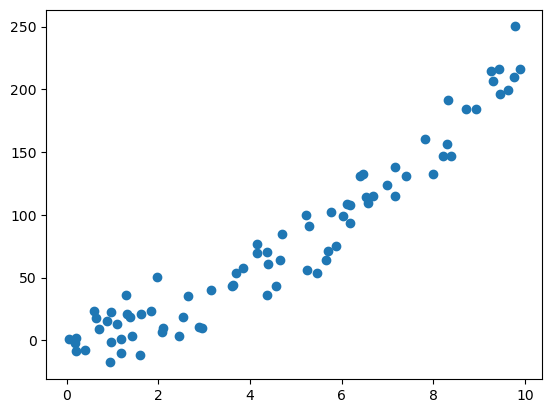

In [4]:
plt.scatter(X_train, y_train.reshape(-1, 1))

### Fit a complex model and calculate bias, variance and MSE

In [5]:
degree = 15
poly_feat = PolynomialFeatures(degree = degree)
X_train_poly = poly_feat.fit_transform(X_train)
X_test_poly = poly_feat.fit_transform(X_test)
model = LinearRegression()
model.fit(X_train_poly, y_train)

mse, bias, var = bias_variance_decomp(model, X_train_poly, y_train, X_test_poly, y_test, loss ="mse", num_rounds = 200, random_seed = 123)
y_pred = model.predict(X_test_poly)

# Summarize results
print('MSE from bias_variance lib [avg expected loss]: %.3f' % mse)
print('Avg Bias: %.3f' % bias)
print('Avg Variance: %.3f' % var)
print('Mean Square error by sklearn: %.3f' % metrics.mean_squared_error(y_test, y_pred))



MSE from bias_variance lib [avg expected loss]: 382.991
Avg Bias: 287.618
Avg Variance: 95.373
Mean Square error by sklearn: 310.712


### Plot the predection line along the training data

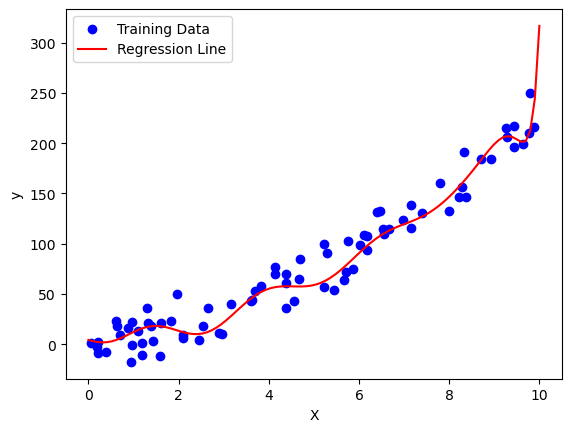

In [6]:
X_range = np.linspace(0,10,100).reshape(-1,1)
X_range_poly = poly_feat.transform(X_range)
y_range_pred = model.predict(X_range_poly)
plt.scatter(X_train, y_train.reshape(-1, 1), c= 'b', label='Training Data')
plt.plot(X_range, y_range_pred, color='red', label='Regression Line')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

### Plot the predection line along the test data

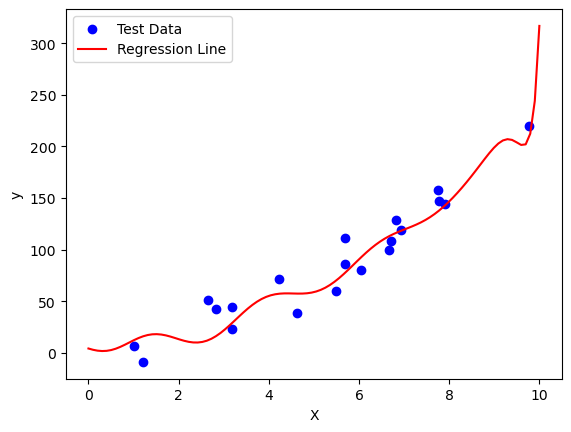

In [7]:
# Generate a range of X values for plotting
X_range = np.linspace(0, 10, 100).reshape(-1, 1)
X_range_poly = poly_feat.transform(X_range)

# Make predictions on the range of X values
y_range_pred = model.predict(X_range_poly)

# Scatter the data
plt.scatter(X_test, y_test.reshape(-1, 1), c= 'b', label='Test Data')

# Plot the regression line
plt.plot(X_range, y_range_pred, color='red', label='Regression Line')

# Add labels and legend
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

# Show the plot
plt.show()

### Fit a moderate model and calculate bias, variance and MSE

In [8]:
degree = 2
poly_feat = PolynomialFeatures(degree = degree)
X_train_poly = poly_feat.fit_transform(X_train)
X_test_poly = poly_feat.fit_transform(X_test)
model.fit(X_train_poly, y_train)
mse, bias, var = bias_variance_decomp(model, X_train_poly, y_train, X_test_poly, y_test, loss ="mse", num_rounds = 200, random_seed = 123)
y_pred = model.predict(X_test_poly)

# Summarize results
print('MSE from bias_variance lib [avg expected loss]: %.3f' % mse)
print('Avg Bias: %.3f' % bias)
print('Avg Variance: %.3f' % var)
print('Mean Square error by sklearn: %.3f' % metrics.mean_squared_error(y_test, y_pred))


MSE from bias_variance lib [avg expected loss]: 212.729
Avg Bias: 205.325
Avg Variance: 7.404
Mean Square error by sklearn: 213.848


### Plot the predection line along the training data

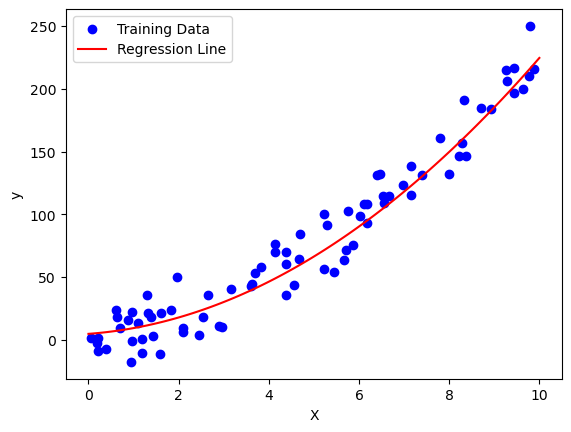

In [9]:
X_range = np.linspace(0,10,100).reshape(-1,1)
X_range_poly = poly_feat.transform(X_range)
y_range_pred = model.predict(X_range_poly)
plt.scatter(X_train, y_train.reshape(-1, 1), c= 'b', label='Training Data')
plt.plot(X_range, y_range_pred, color='red', label='Regression Line')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

### Plot the predection line along the test data

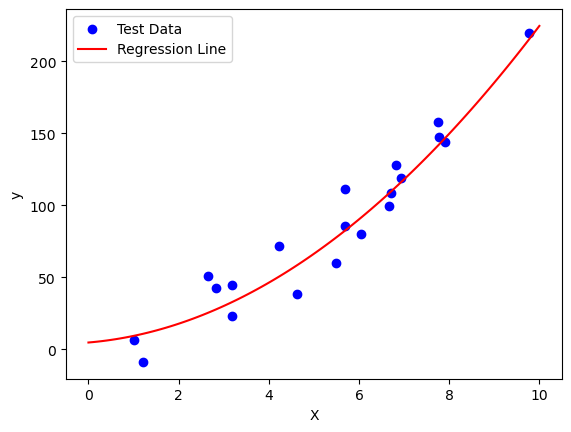

In [10]:
# Generate a range of X values for plotting
X_range = np.linspace(0, 10, 100).reshape(-1, 1)
X_range_poly = poly_feat.transform(X_range)

# Make predictions on the range of X values
y_range_pred = model.predict(X_range_poly)

# Scatter the data
plt.scatter(X_test, y_test.reshape(-1, 1), c= 'b', label='Test Data')

# Plot the regression line
plt.plot(X_range, y_range_pred, color='red', label='Regression Line')

# Add labels and legend
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

# Show the plot
plt.show()